In [8]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
      distance = []
      for j in range(centroids.shape[0]):
        norm_ij = np.linalg.norm(X[i] - centroids[j])
        distance.append(norm_ij)

      idx[i] = np.argmin(distance)

    return idx

In [10]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
      points = X[idx == k]
      centroids[k] = np.mean(points, axis = 0)
    return centroids

In [11]:
def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    for i in range(max_iters):
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    plt.show()
    return centroids, idx

In [12]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]

    return centroids

In [21]:
original_img = plt.imread('beautifulforest.png')
# Get Red Intensity: red_intensity = original_img[50, 33, 0]
# Get Green Intensity: green_intensity = original_img[50, 33, 1]
# Get All Color Intensities: pixel_colors = original_img[50, 33, :] (returns an array like [R, G, B])
# Set a Pixel's Blue Intensity: original_img[50, 33, 2] = 128 (sets the blue intensity to 128)

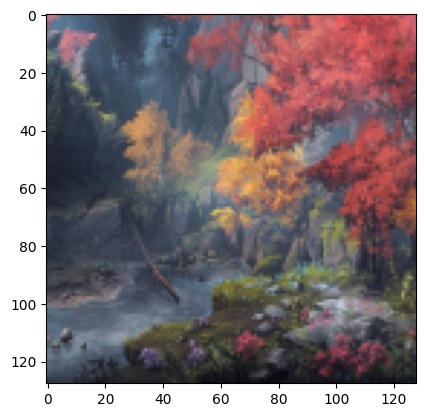

In [14]:
plt.imshow(original_img)

In [15]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 4)


In [22]:
# original_img = original_img / 255
# Uncomment above if file is jpg
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], original_img.shape[2]))

# original_img.shape[0] gives the height (number of rows) of the image.
# original_img.shape[1] gives the width (number of columns) of the image.
# original_img.shape[2] gives the number of color channels, which is 3 for an RGB image.

In [17]:
K = 16
# You can change K . K = Number of colors image is compressed to.
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [18]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [7 6 6 9 5]


In [19]:
idx = find_closest_centroids(X_img, centroids)

X_recovered = centroids[idx, :]

X_recovered = np.reshape(X_recovered, original_img.shape)

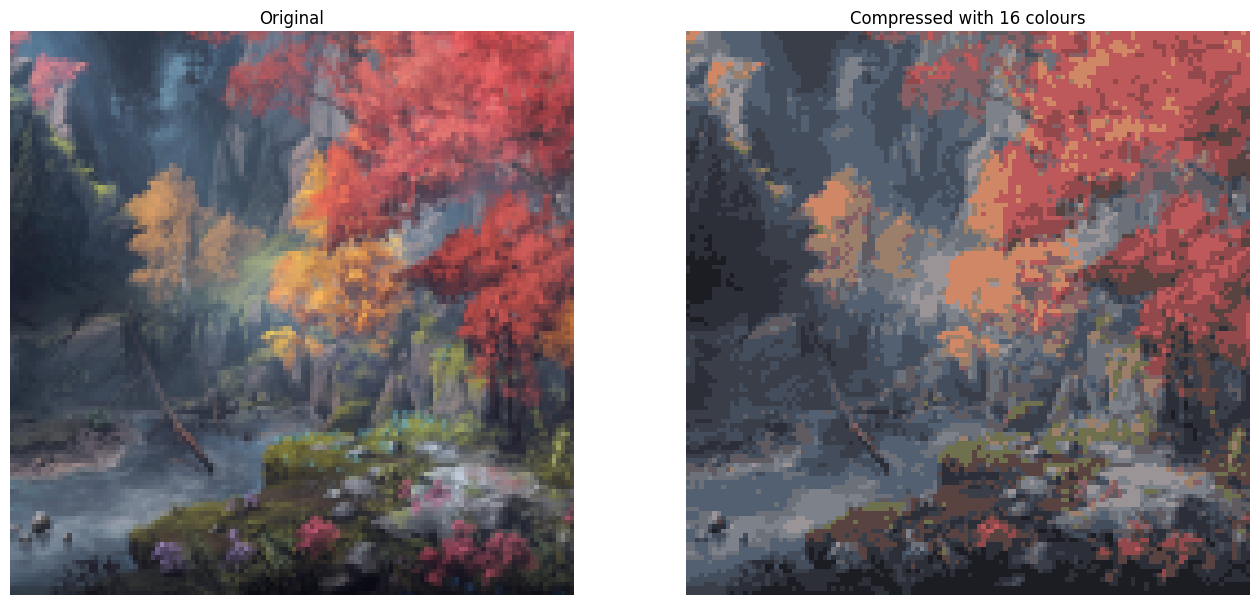

In [20]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()